In [13]:
import pandas as pd
from pycaret.classification import *

In [14]:
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
train_titanic = setup(data = train, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['Name','Ticket','Cabin'],
             silent = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7661
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [20]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.818800,0.856200,0.703300,0.803100,0.746900,0.607200
1,Gradient Boosting Classifier,0.815400,0.876800,0.715400,0.784600,0.746400,0.602200
2,CatBoost Classifier,0.815400,0.874100,0.719900,0.785400,0.749500,0.604000
3,Extreme Gradient Boosting,0.813900,0.874100,0.707100,0.785000,0.741900,0.597500
4,Ridge Classifier,0.812400,0.000000,0.690600,0.798000,0.737100,0.593000
5,Light Gradient Boosting Machine,0.812200,0.864800,0.736400,0.765900,0.748300,0.599000
6,Linear Discriminant Analysis,0.809200,0.856400,0.690600,0.789900,0.734100,0.586800
7,Ada Boost Classifier,0.793000,0.849300,0.719900,0.740000,0.726200,0.560500
8,Random Forest Classifier,0.751400,0.818400,0.640400,0.695000,0.663800,0.467600
9,Decision Tree Classifier,0.746400,0.726400,0.669700,0.680400,0.669300,0.464900


In [21]:
test = pd.read_csv('http://bit.ly/kaggletest')

In [22]:
lr  = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7619,0.7447,0.5000,0.8000,0.6154,0.4560
1,0.7778,0.8440,0.7083,0.7083,0.7083,0.5288
2,0.8254,0.8814,0.7083,0.8095,0.7556,0.6207
3,0.8548,0.8517,0.7826,0.8182,0.8000,0.6862
4,0.8548,0.8838,0.7917,0.8261,0.8085,0.6917
5,0.8226,0.8651,0.7083,0.8095,0.7556,0.6173
6,0.8065,0.8169,0.7500,0.7500,0.7500,0.5921
7,0.9194,0.9572,0.7917,1.0000,0.8837,0.8233
8,0.7419,0.8388,0.5833,0.7000,0.6364,0.4389
9,0.8226,0.8783,0.7083,0.8095,0.7556,0.6173


In [23]:
tuned_lr = tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7619,0.7543,0.5417,0.7647,0.6341,0.4652
1,0.7778,0.8451,0.7083,0.7083,0.7083,0.5288
2,0.8095,0.8654,0.7500,0.7500,0.7500,0.5962
3,0.7903,0.8406,0.7826,0.6923,0.7347,0.5624
4,0.8548,0.8805,0.7917,0.8261,0.8085,0.6917
5,0.8065,0.8564,0.7083,0.7727,0.7391,0.5857
6,0.8065,0.8169,0.7917,0.7308,0.7600,0.5983
7,0.9194,0.9539,0.7917,1.0000,0.8837,0.8233
8,0.7581,0.8410,0.5833,0.7368,0.6512,0.4698
9,0.8226,0.8838,0.7083,0.8095,0.7556,0.6173


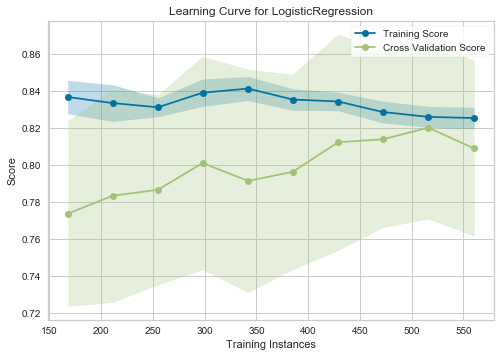

In [24]:
plot_model(estimator = tuned_lr, plot = 'learning')

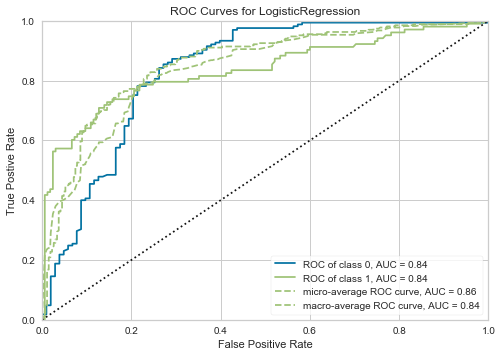

In [25]:
plot_model(estimator = tuned_lr, plot = 'auc')

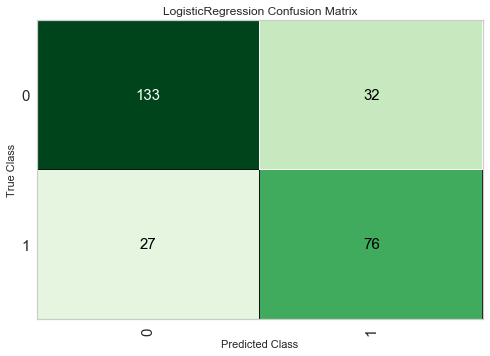

In [26]:
plot_model(estimator = tuned_lr, plot = 'confusion_matrix')

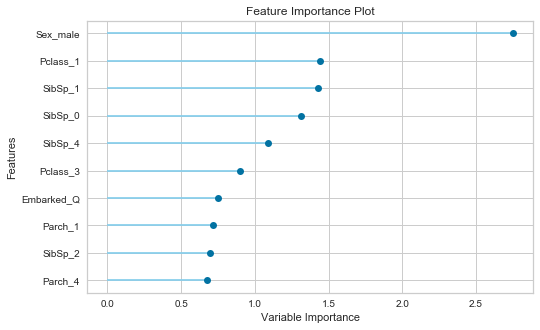

In [27]:
plot_model(estimator = tuned_lr, plot = 'feature')

In [28]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [31]:
#interpret_model(tuned_lr)

SystemExit: (Type Error): This function only supports tree based models for binary classification.

In [32]:
predict_model(tuned_lr, data=test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.1403
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.3998
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.1403
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.0847
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0.7471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.0757
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9288
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.0524
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.0757


In [36]:
predictions = predict_model(tuned_lr, data=test)
predictions.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.1403
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.3998
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.1403
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.0847
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0.7471
